---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    df = pd.read_csv('assets/fraud_data.csv')
    y = df.iloc[:,-1]
    frequencies = y.value_counts()
    total_obs = len(y)
    return frequencies[1]/total_obs

answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score

    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X_train, y_train)
    
    y_pred = dummy_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    recall = recall_score(y_test, y_pred)
    
    return(accuracy, recall)

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    
    svc_clf = SVC()
    svc_clf.fit(X_train, y_train)
    
    y_pred = svc_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    recall = recall_score(y_test, y_pred)
    
    precision = precision_score(y_test, y_pred)
    
    return (accuracy, recall, precision)

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svc_clf = SVC(C=1e9, gamma=1e-07)
    svc_clf.fit(X_train, y_train)
    
    decision_fn_scores = svc_clf.decision_function(X_test)
    
    threshold = -220
    
    y_pred = (decision_fn_scores > threshold).astype(int)
    
    cmatrix = confusion_matrix(y_test, y_pred)
    
    return cmatrix
    
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [7]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    lreg = LogisticRegression()
    lreg.fit(X_train, y_train)
    
    y_proba = lreg.predict_proba(X_test)[:, 1]
    
    precision, recall, pr_threshold = precision_recall_curve(y_test, y_proba)
    
    fpr, tpr, roc_threshold = roc_curve(y_test, y_proba)
    
    recall_at_precision = recall[(precision > 0.749) & (precision <= 0.750)][0]
    
    tpr_at_fpr = tpr[(fpr > 0.1475) & (fpr <= 0.16)][0]
    
    return (recall_at_precision, tpr_at_fpr)

answer_five()

/home/ari/miniconda3/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.825, 0.9125)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [8]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}
    
    lreg = LogisticRegression(solver='liblinear')
    
    grid_clf = GridSearchCV(lreg, param_grid=grid_values, scoring='recall', cv=3)
    grid_clf.fit(X_train, y_train)
    
    mean_test_scores = grid_clf.cv_results_['mean_test_score']
    
    return_array = np.array(mean_test_scores).reshape(4, 2)
    
    return return_array

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ]])

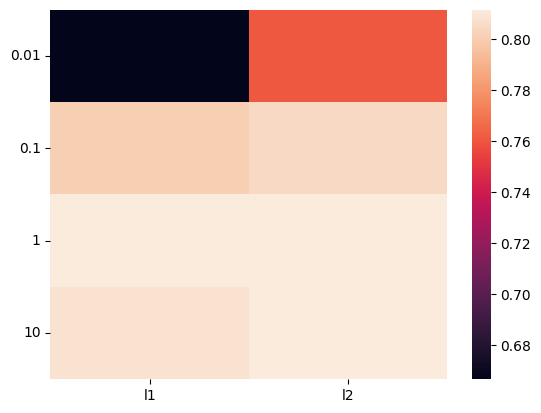

In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())